In [4]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('factbook.db')
q1 = "SELECT * FROM sqlite_master WHERE type = 'table';"
pd.read_sql_query(q1, conn)

type             name         tbl_name  rootpage  \
0  table            facts            facts         2   
1  table  sqlite_sequence  sqlite_sequence         3   

                                                 sql  
0  CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY...  
1             CREATE TABLE sqlite_sequence(name,seq)

In [5]:
q2 = 'select * from facts limit 5'
pd.read_sql_query(q2, conn)

id code         name     area  area_land  area_water  population  \
0   1   af  Afghanistan   652230     652230           0    32564342   
1   2   al      Albania    28748      27398        1350     3029278   
2   3   ag      Algeria  2381741    2381741           0    39542166   
3   4   an      Andorra      468        468           0       85580   
4   5   ao       Angola  1246700    1246700           0    19625353   

   population_growth  birth_rate  death_rate  migration_rate  \
0               2.32       38.57       13.89            1.51   
1               0.30       12.92        6.58            3.30   
2               1.84       23.67        4.31            0.92   
3               0.12        8.13        6.96            0.00   
4               2.78       38.78       11.49            0.46   

                   created_at                  updated_at  
0  2015-11-01 13:19:49.461734  2015-11-01 13:19:49.461734  
1  2015-11-01 13:19:54.431082  2015-11-01 13:19:54.431082  
2  2015-11-01 13:19:59.961286  2015-11-01 13:19:59.961286  
3  2015-11-01 13:20:03.659945  2015-11-01 13:20:03.659945  
4  2015-11-01 13:20:08.625072  2015-11-01 13:20:08.625072

In [6]:
q3 = 'select MIN(population) as min_population, MAX(population) as max_population, MIN(population_growth) as min_growth, MAX(population_growth) as max_growth from facts'
pd.read_sql_query(q3, conn)

min_population  max_population  min_growth  max_growth
0               0      7256490011         0.0        4.02

In [7]:
q4 = 'select name from facts where population = (select MIN(population) from facts)'
pd.read_sql_query(q4, conn)

name
0  Antarctica

In [8]:
q5 = 'select name from facts where population = (select MAX(population) from facts)'
pd.read_sql_query(q5, conn)

name
0  World

There are only penguins in Antartica, and the world's population is certainly the most.

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff639072ac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff638b18ba8>]], dtype=object)

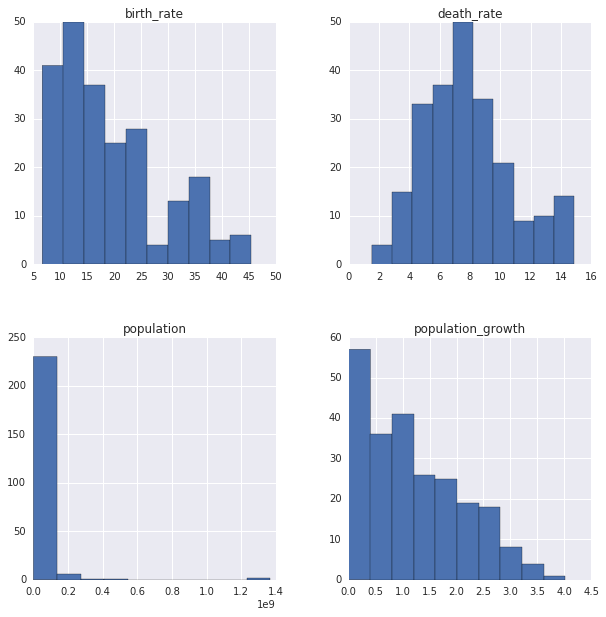

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q6 = 'select population, population_growth, birth_rate, death_rate from facts where population != (select MIN(population) from facts) AND population != (select MAX(population) from facts)'
pd.read_sql_query(q6, conn).hist(ax=ax)

In [16]:
q7 = 'select name, CAST(population as Float)/CAST(area_land as Float) as population_density from facts order by population_density desc'
pd.read_sql_query(q7, conn)

name  population_density
0                                            Macau        21168.964286
1                                           Monaco        15267.500000
2                                        Singapore         8259.784571
3                                        Hong Kong         6655.271202
4                                       Gaza Strip         5191.819444
5                                        Gibraltar         4876.333333
6                                          Bahrain         1771.859211
7                                         Maldives         1319.640940
8                                            Malta         1310.015823
9                                          Bermuda         1299.925926
10                                      Bangladesh         1297.977606
11                                    Sint Maarten         1167.323529
12                                        Guernsey          847.179487
13                                          Jersey          838.741379
14                                          Taiwan          725.825356
15                                        Barbados          675.823256
16                                       Mauritius          660.013300
17                                           Aruba          623.122222
18                                         Lebanon          604.565103
19                                    Saint Martin          588.037037
20                                      San Marino          541.311475
21                                          Rwanda          513.285755
22                                    Korea, South          506.760173
23                                     Netherlands          500.041424
24                                       West Bank          493.859220
25                                           Nauru          454.285714
26                                           India          420.993721
27                                         Burundi          418.312928
28                                          Tuvalu          418.038462
29                                     Puerto Rico          405.677227
..                                             ...                 ...
231                                      Greenland            0.026653
232                                     Antarctica            0.000000
233                                       Ethiopia                 NaN
234                                    South Sudan                 NaN
235                                          Sudan                 NaN
236                        Holy See (Vatican City)                 NaN
237                                 European Union                 NaN
238                    Ashmore and Cartier Islands                 NaN
239                              Coral Sea Islands                 NaN
240              Heard Island and McDonald Islands                 NaN
241                              Clipperton Island                 NaN
242            French Southern and Antarctic Lands                 NaN
243                               Saint Barthelemy                 NaN
244                                  Bouvet Island                 NaN
245                                      Jan Mayen                 NaN
246                                       Akrotiri                 NaN
247                 British Indian Ocean Territory                 NaN
248                                       Dhekelia                 NaN
249       South Georgia and South Sandwich Islands                 NaN
250                                 Navassa Island                 NaN
251                                    Wake Island                 NaN
252  United States Pacific Island Wildlife Refuges                 NaN
253                                Paracel Islands                 NaN
254                                Spratly Islands                 NaN
255                                   Arctic Ocean                 NaN

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6389737b8>]], dtype=object)

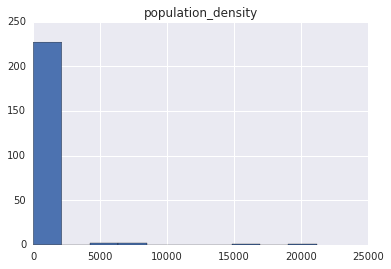

In [18]:
q8 = 'select CAST(population as Float)/CAST(area_land as Float) as population_density from facts order by population_density desc'
pd.read_sql_query(q8, conn).hist()